In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans


In [2]:
def plot_features(data, column_names, plot_name):
    plt.figure(figsize=(5,3))
    sns.violinplot(data=data, inner="quartile", palette="Set2")

    # Set labels
    plt.xticks(ticks=np.arange(len(column_names)), labels=column_names, rotation=30)
    plt.title(plot_name, fontsize=14)
    plt.ylabel("Value", fontsize=12)
    plt.xlabel("Features", fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
# Importing the data and creating the features
variables = [
'PRECTOTCORR',
# 'RH2M',
 'T2M',
 'T2M_MAX',
 'T2M_MIN',
 'WS2M']

features = []

doys = None
for variable in variables:
    #variable = variables[0]
    climate = pd.read_csv(fr'..\resources\{variable}\complete_dataset_{variable}.csv')



    new_feature = climate\
            .groupby(['YEAR','DOY'])\
            .mean()[climate.columns[-1]]\
            
    if type(doys) == type(None) :
        doys = climate\
            .groupby(['YEAR','DOY'])\
            .mean().reset_index().DOY.to_numpy()

    features.append(new_feature)

#features = np.array(features).T


In [116]:
temp_df = pd.concat(features, axis=1)
temp_df = (temp_df-temp_df.min())/(temp_df.max()-temp_df.min())
temp_df.reset_index(inplace=True)
temp_df["month"] = pd.to_datetime(temp_df["YEAR"].astype(str) + temp_df["DOY"].astype(str), format="%Y%j").dt.month


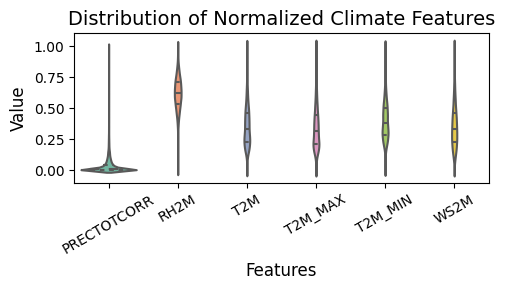

In [117]:
plot_features(temp_df[variables].to_numpy(), variables, "Distribution of Normalized Climate Features")

In [118]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw")
model.fit(temp_df[variables])

TimeSeriesKMeans(metric='dtw')

In [119]:
centers = model.predict(temp_df[variables])


c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\utils\utils.py:108: UserWarning: 2-Dimensional data passed. Assuming these are 16071 1-dimensional timeseries
  warnings.warn(


In [ ]:
temp_df['kmeans_dtw'] = centers
data = temp_df.copy()
data['seasons_kmeans'] = data.apply(lambda x: 3 if (x['kmeans_dtw']==2) & (x['month']>=7) else x['kmeans_dtw'], axis=1)

In [ ]:
data[data.kmeans_dtw == 0].month.value_counts()

7     1344
8     1290
6     1208
9     1099
10     878
5      730
11     525
4      268
12     249
3       89
1       77
2       40
Name: month, dtype: int64

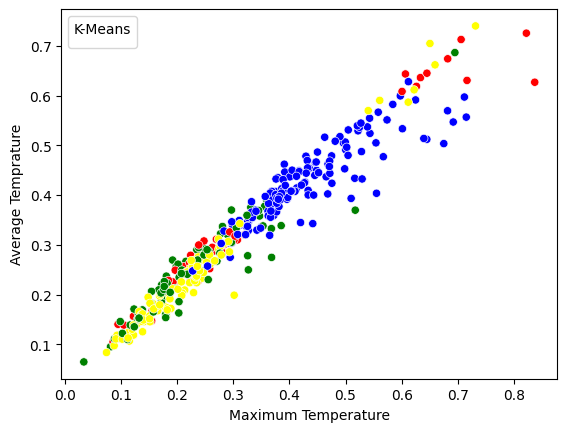

In [121]:
fig = sns.scatterplot(data=data.loc[data['YEAR']==1987], x = 'T2M_MAX', y='T2M',hue = 'seasons_kmeans',palette=['blue','green','red','yellow'])
plt.legend(title='K-Means',loc='upper left', labels=[])
plt.xlabel('Maximum Temperature')
plt.ylabel('Average Temprature')
plt.show()

In [122]:
conditions = [
    (data['seasons_kmeans']==0),
    (data['seasons_kmeans']==1),
    (data['seasons_kmeans']==2), (data['seasons_kmeans']==3)]
choices = ['Spring','Summer','Winter','Fall']
data['Kmeans_dtw_season_name'] = np.select(conditions, choices, default='black')

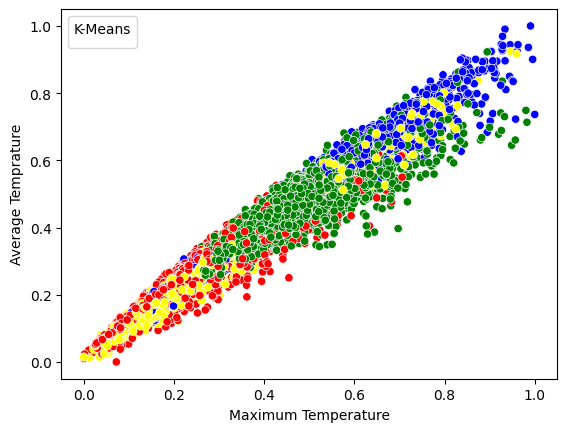

In [123]:
fig = sns.scatterplot(data=data, x = 'T2M_MAX', y='T2M',hue = 'Kmeans_dtw_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='K-Means',loc='upper left', labels=[])
plt.xlabel('Maximum Temperature')
plt.ylabel('Average Temprature')
plt.show()

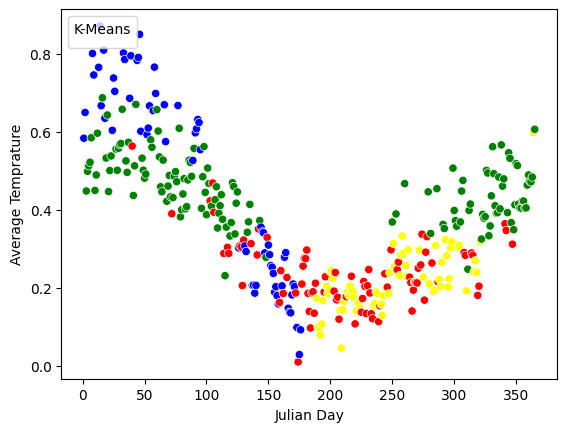

In [124]:
fig = sns.scatterplot(data=data.loc[data['YEAR']==1981], x = 'DOY', y='T2M',hue = 'Kmeans_dtw_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='K-Means',loc='upper left', labels=[])
plt.xlabel('Julian Day')
plt.ylabel('Average Temprature')
plt.show()